# 과일 이미지를 비지도 학습으로 분류해 보자

In [4]:
# k평균 
# 무작위로 k개의 클러스터를 중심으로 정한다
# 각 셈플에서 가장 가까운 클러스터의 중심을 찾아 해당 클러스터의 샘플을 저장
# 샘플의 평균갑시으로 클러스터의 중심을 변경
# 클러스터의 중심에 변화가 없을 때 까지 반복한다

In [5]:
! pip install wget

In [6]:
import wget
url = 'http://bit.ly/fruits_300_data'
wget.download(url)

100% [..........................................................................] 3000128 / 3000128

'fruits_300_data'

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
fruits = np.load('fruits_300_data')
fruits.shape, type(fruits)

((300, 100, 100), numpy.ndarray)

In [8]:
fruits2 = fruits.reshape(-1, 100*100)
fruits.shape

(300, 100, 100)

In [9]:
# 3개의 군집으로 분류하기
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits2)

KMeans(n_clusters=3, random_state=42)

In [11]:
km.labels_ # 넘파이 배열

# kmeans.labels_  --> 각 데이터가 어떤 클러스터에 속하는지 그 결과를 표현
# 여기서 0,1,2 는 품종을 나타냄

array([2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [12]:
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2]), array([111,  98,  91], dtype=int64))

In [13]:
# 각 클러스터가 어떤 이미지를 나타내는지 살펴보기
import matplotlib.pyplot as plt

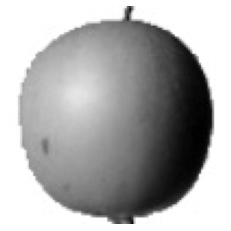

In [32]:
fruits[km.labels_ == 0][0]
plt.imshow(fruits[km.labels_ == 2][0], cmap = 'gray_r')
plt.axis('off')
plt.show()

In [35]:
fruits[km.labels_ == 0]
len(fruits[km.labels_ == 0])

111

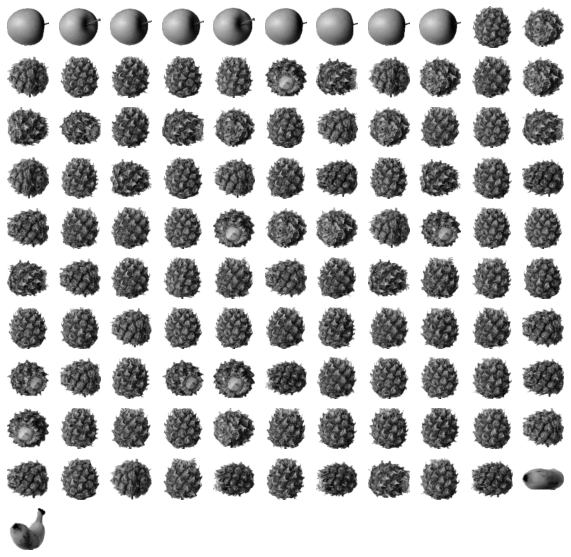

In [39]:
# 111개 모두 그려주려면?

fig, axs =  plt.subplots(11,11, figsize=(10,10))
count = 0
for i in range(11):
    for j in range(11): # i가 11번 j가 11번씩 총 111번 반복
        if count < 111:
            axs[i,j].imshow(fruits[km.labels_ == 0][i*11+j], cmap='gray_r')
        axs[i,j].axis('off')
        count += 1
plt.show()
# 파인애플과 비슷한 이미지를 반환 (사과와 바나나도 함께 출력됨 --> 특징을 잡아주는 함수 필요)

In [62]:
# 사이즈가 각각 111, 98, 91개일 때 알맞게 화면 분할하는 for문 ?
# print(round(np.sqrt(98))) # sqrt : 제곱근 구하는 함수
                            # round - Default : 0 (즉 정수까지 반올림)
# 제곱근만큼 for문 두개를 돌리면 10일 때 100번 돌기 때문

def showDetectLebelImage(fruitsLabel, size):
    loopsize = round(np.sqrt(size))
    fig, axs =  plt.subplots(loopsize,loopsize, figsize=(10,10))
    count = 0
    
    for i in range(loopsize):
        for j in range(loopsize): # i가 11번 j가 11번씩 총 111번 반복
            if count < size:
                axs[i,j].imshow(fruits[km.labels_ == fruitsLabel][i*loopsize+j], cmap='gray_r')
            axs[i,j].axis('off')
            count += 1
    plt.show()

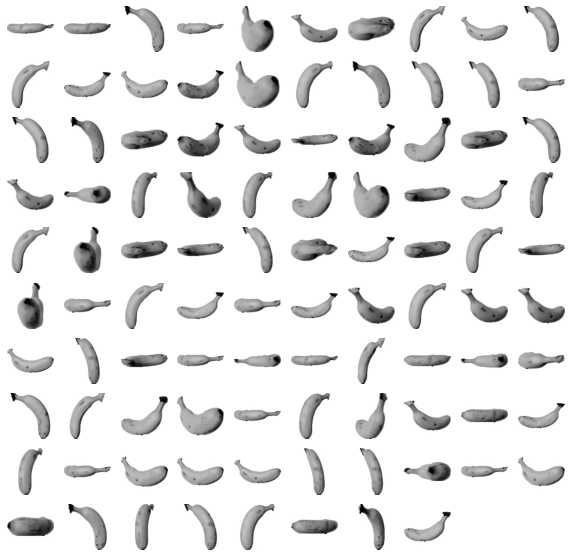

In [63]:
showDetectLebelImage(1,98)

In [64]:
km.cluster_centers_ # 클러스터의 중심값
# 이미지 1개가 100*100 이므로 총 10000개임을 알 수 있음

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.10204082, 1.07142857, 1.10204082, ..., 1.        , 1.        ,
        1.        ],
       [1.01098901, 1.01098901, 1.01098901, ..., 1.        , 1.        ,
        1.        ]])

In [66]:
centerImage = km.cluster_centers_.reshape(-1, 100, 100) # 다시 원래의 자료형태로 만들기
len(centerImage)

3

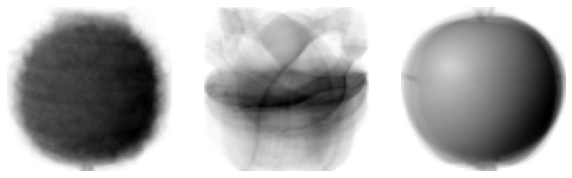

In [75]:
fig, axs =  plt.subplots(1,3, figsize=(10,10)) # 한줄에 세개씩

for i in range(3):
    axs[i].imshow(centerImage[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

# 거의 잘 나옴
# 군집의 개수를 3(정답)이 아닌 다른 수로도 한 번 복습해 보기

In [74]:
# 최적의 엘보우(k값)를 찾아내기

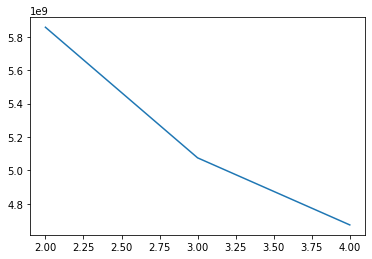

In [80]:
# km.inertia_ : 클러스터의 중심과 클러스터에 속한 샘플 사이의 거리의 제곱의 합 반환
# 군집이 잘 되어 있으면 값이 엘보우로 잘 나옴
# 엘보우...클러스터를 늘려가면서 이니셔 값을 확인하면 어느 순간 꺾이는 구간이 흡사 팔 꺾이는 것처럼 보이고
#          그 점이 최적의 값임을 알 수 있음

result = []
for k in range(2,5):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(fruits2)
    result.append(km.inertia_)
plt.plot(range(2,5), result) # 클러스터의 개수, result의 개수
plt.show()

# 데이터를 줄여주면 그래프의 선이 보다 더 세밀하게 드러나므로 완만하게 보일 때 데이터를 줄여가며 확인하기